# Proyek Analisis Data: Air Quality
- **Nama:** Muhammad Makarim
- **Email:** mmakarim9@student.ub.ac.id
- **ID Dicoding:** MC006D5Y1427

## Menentukan Pertanyaan Bisnis

- Bagaimana tren harian rata-rata PM2.5 sepanjang Maret 2013 di setiap stasiun?
- Bagaimana distribusi kategori kualitas udara berdasarkan PM2.5 disetiap stasiun?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from google.colab import files

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_path = "/content/drive/My Drive/Dataset/Air-quality-dataset.zip"

# Path tujuan ekstraksi
extract_path = "/content/drive/My Drive/Dataset/analisis_data"

# Ekstrak file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset berhasil diekstrak ke:", extract_path)

Dataset berhasil diekstrak ke: /content/drive/My Drive/Dataset/analisis_data


In [ ]:
# Path ke folder dataset
dataset_path = "/content/drive/My Drive/Dataset/analisis_data/PRSA_Data_20130301-20170228"

# Gabungkan semua file CSV dari berbagai stasiun
dataframes = []
for file in os.listdir(dataset_path):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(dataset_path, file))
        dataframes.append(df)

# Gabungkan semua data dalam satu DataFrame
air_df = pd.concat(dataframes, ignore_index=True)

# Konversi kolom waktu menjadi datetime
air_df['datetime'] = pd.to_datetime(air_df[['year', 'month', 'day', 'hour']])

In [ ]:
air_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


**Insight:**
- Pada tahap gathring data ini, saya berhasil untuk mengimport dataset dari air quality yang berbentuk zip file.
- Dikarenakan banyaknya dataset .csv yang ada pada zip file yang sudah di ekstrak, maka kita harus menerapkan metode join
- Data terdiri dari pengamatan kualitas udara di berbagai stasuin di China, dengan kolom seperti PM2.5, PM10, SO2, NO2, dan variabel cuaca lain.

### Assessing Data

In [ ]:
print(air_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   year      420768 non-null  int64         
 2   month     420768 non-null  int64         
 3   day       420768 non-null  int64         
 4   hour      420768 non-null  int64         
 5   PM2.5     412029 non-null  float64       
 6   PM10      414319 non-null  float64       
 7   SO2       411747 non-null  float64       
 8   NO2       408652 non-null  float64       
 9   CO        400067 non-null  float64       
 10  O3        407491 non-null  float64       
 11  TEMP      420370 non-null  float64       
 12  PRES      420375 non-null  float64       
 13  DEWP      420365 non-null  float64       
 14  RAIN      420378 non-null  float64       
 15  wd        418946 non-null  object        
 16  WSPM      420450 non-null  float64    

In [ ]:
print(air_df.describe())

                  No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   
std     10122.116943       1.177198       3.448707       8.800102   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  412029.000000  414319.000000  411747.000000   
mean       11.500000      79.793428     104.602618      15.830835   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      20.000000      36.000000       3.000000   
50%        11.500000      55.0000

In [ ]:
missing_values = air_df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 PM2.5     8739
PM10      6449
SO2       9021
NO2      12116
CO       20701
O3       13277
TEMP       398
PRES       393
DEWP       403
RAIN       390
wd        1822
WSPM       318
dtype: int64


In [ ]:
duplikasi_subset = air_df.duplicated(subset=['year', 'month', 'day', 'hour', 'station']).sum()
print(f"Jumlah data yang terduplikasi berdasarkan waktu & stasiun: {duplikasi_subset}")

Jumlah data yang terduplikasi berdasarkan waktu & stasiun: 0


**Insight:**
- Tidak ada duplikasi data yang ditemukan pada dataset air quality semua stasiun.
- Dari pengecekan missing values, terdapat variabel yang hilang di dalam dataset air quality pada beberapa stasiun.

### Cleaning Data

In [ ]:
missing_values = air_df.isnull().sum()
print("Jumlah missing values per kolom:\n", missing_values[missing_values > 0])

Jumlah missing values per kolom:
 PM2.5     8739
PM10      6449
SO2       9021
NO2      12116
CO       20701
O3       13277
TEMP       398
PRES       393
DEWP       403
RAIN       390
wd        1822
WSPM       318
dtype: int64


In [ ]:
air_df.dropna(axis=0, inplace=True)

In [ ]:
print("Sudah tidak ada data yang hilang?", air_df.isnull().sum().sum() == 0)

Sudah tidak ada data yang hilang? True


In [ ]:
#Mengecek kembali apakah masih ada missing value apa tidak
missing_values = air_df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [ ]:
print(air_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 382168 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        382168 non-null  int64         
 1   year      382168 non-null  int64         
 2   month     382168 non-null  int64         
 3   day       382168 non-null  int64         
 4   hour      382168 non-null  int64         
 5   PM2.5     382168 non-null  float64       
 6   PM10      382168 non-null  float64       
 7   SO2       382168 non-null  float64       
 8   NO2       382168 non-null  float64       
 9   CO        382168 non-null  float64       
 10  O3        382168 non-null  float64       
 11  TEMP      382168 non-null  float64       
 12  PRES      382168 non-null  float64       
 13  DEWP      382168 non-null  float64       
 14  RAIN      382168 non-null  float64       
 15  wd        382168 non-null  object        
 16  WSPM      382168 non-null  float64       
 

In [ ]:
# cek ulang missing values
print("\nMissing Values setelah dilakukan cleaning:")
print(air_df.isnull().sum())


Missing Values setelah dilakukan cleaning:
No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64


**Insight:**
- Sudah tidak ada missing value ditemukan pada dataset
- Seluruh kolom yang mempunyai missing value akan di drop menggunakan .dropna()
- Terlihat besar dataset berkurang (pada code air_df.info()), dikarenakan baris data yang memiliki missing value sudah di drop

## Exploratory Data Analysis (EDA)



```
# This is formatted as code
```

### Explore ...

In [ ]:
air_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168
mean,17955.931070,2014.714905,6.475087,15.711308,11.575184,79.432383,104.573837,15.634814,50.570068,1229.940563,57.376676,13.518694,1010.813471,2.417195,0.065030,1.738031,2015-03-19 02:55:51.850494976
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000,2013-03-01 00:00:00
25%,9610.000000,2014.000000,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,0.900000,2014-04-05 09:00:00
50%,18103.000000,2015.000000,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,1.400000,2015-03-25 06:00:00
75%,26515.000000,2016.000000,9.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000,2016-03-09 18:00:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,10001.787087,1.160266,3.449317,8.803064,6.933552,80.154901,91.379446,21.306103,35.062086,1157.151476,56.709013,11.425355,10.452381,13.798402,0.823901,1.241152,NaN


In [ ]:
air_df['datetime'] = pd.to_datetime(air_df[['year','month','day','hour']])
daily_station_pm25 = air_df.groupby(['station', air_df['datetime'].dt.date])['PM2.5'].mean().reset_index()

**1. Distribusi**

Pembagian distribusi data PM10 dan PM2.5 di berbagai stasiun

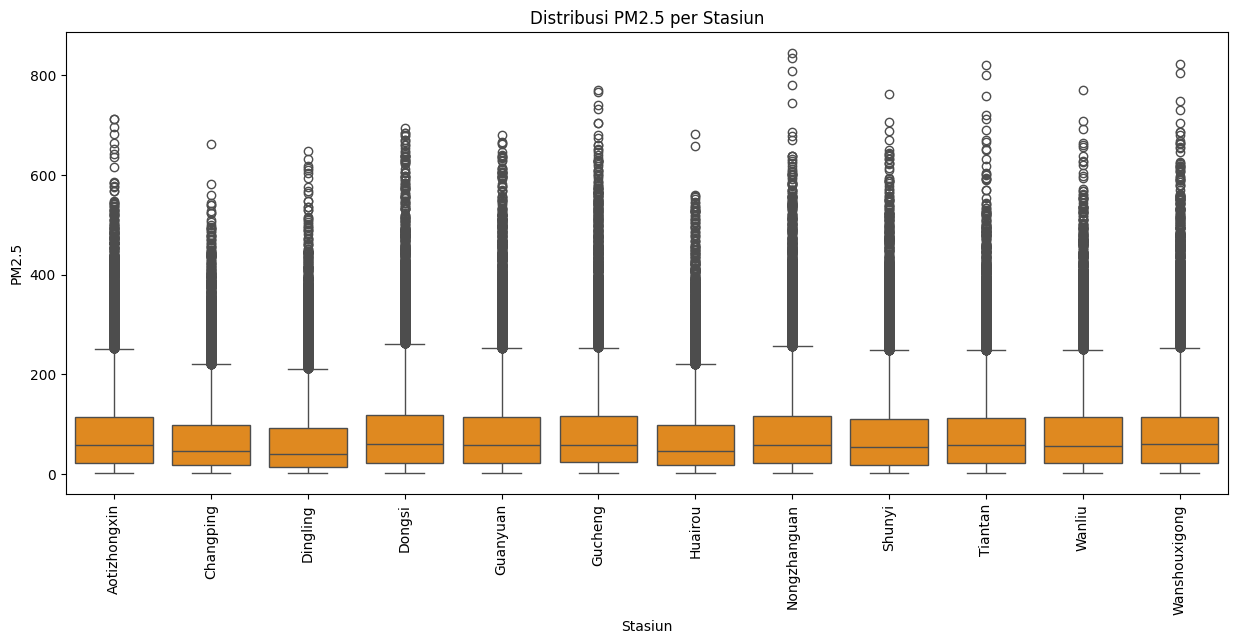

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))
sns.boxplot(x='station', y='PM2.5', data=air_df, color='darkorange')
plt.xlabel("Stasiun")
plt.title('Distribusi PM2.5 per Stasiun')
plt.xticks(rotation=90)
plt.show()

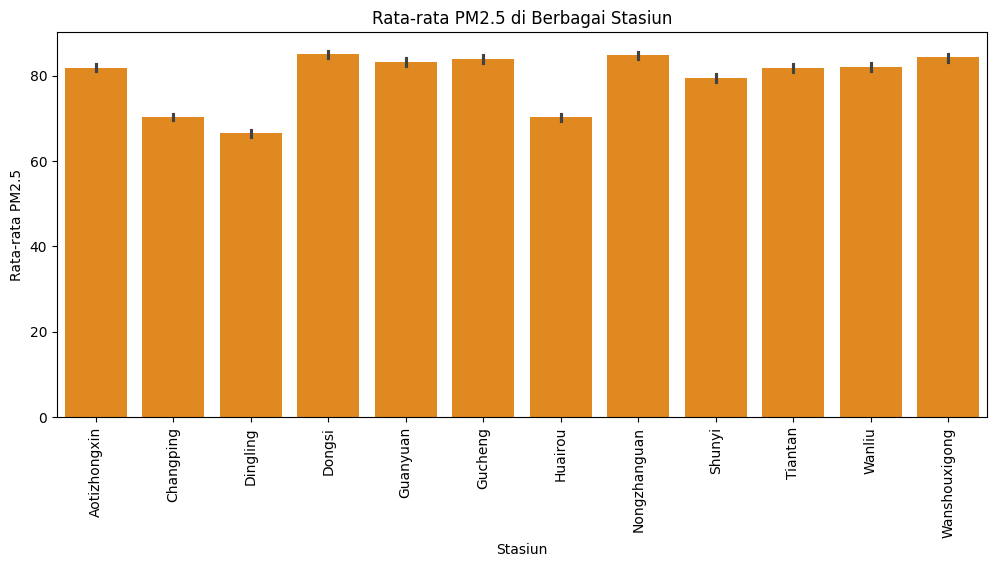

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(x="station", y="PM2.5", data=air_df, estimator=np.mean, color='darkorange')
plt.xlabel("Stasiun")
plt.ylabel("Rata-rata PM2.5")
plt.xticks(rotation=90)
plt.title("Rata-rata PM2.5 di Berbagai Stasiun")
plt.show()

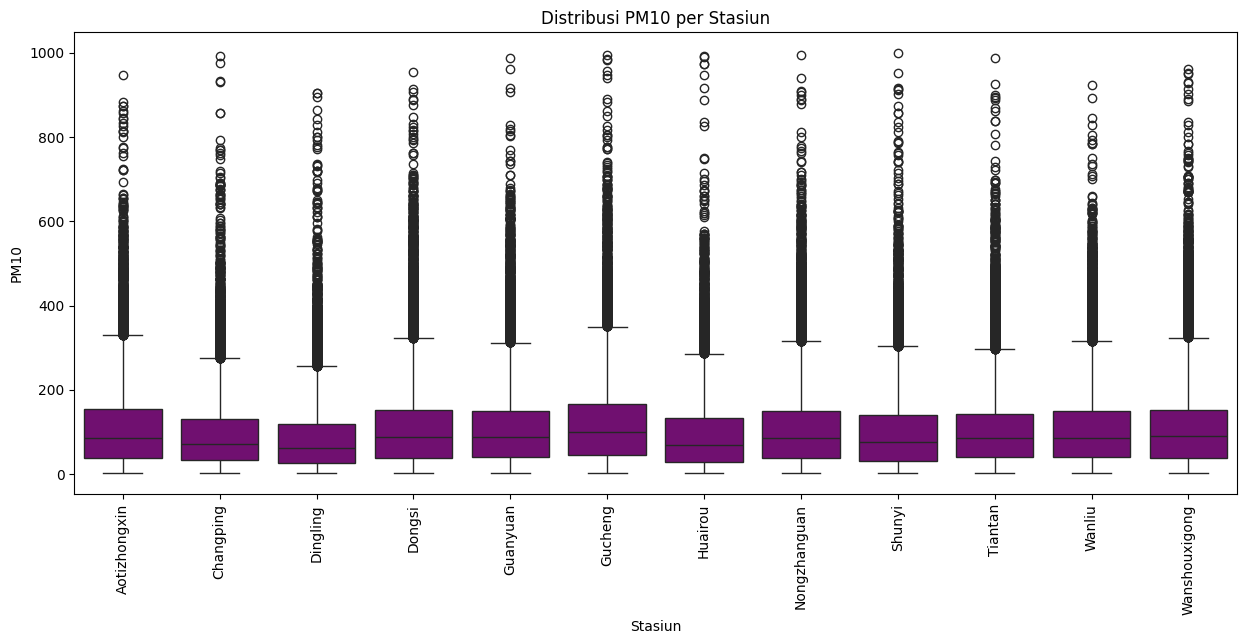

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))
sns.boxplot(x='station', y='PM10', data=air_df, color='purple')
plt.xlabel("Stasiun")
plt.title('Distribusi PM10 per Stasiun')
plt.xticks(rotation=90)
plt.show()

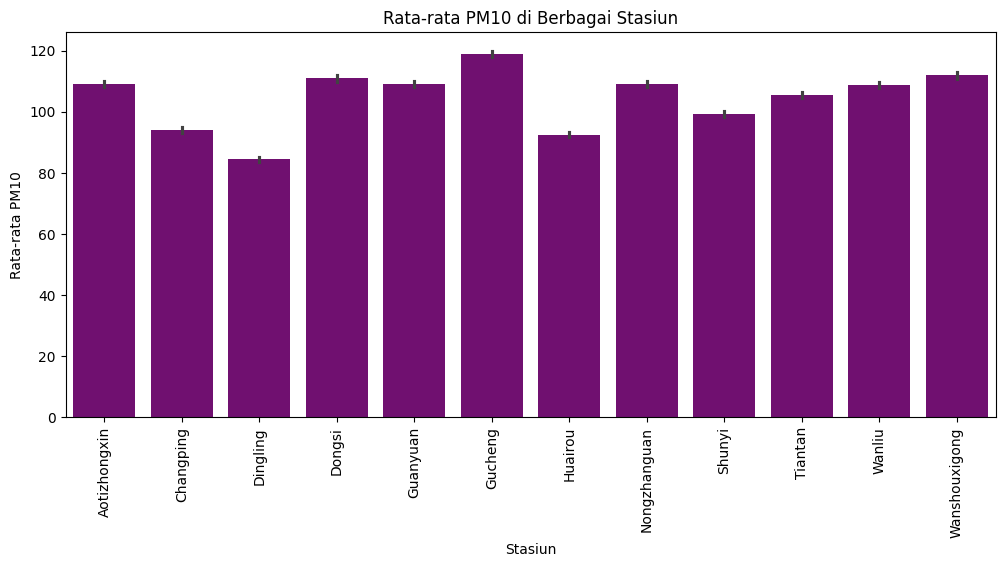

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(x="station", y="PM10", data=air_df, estimator=np.mean, color='purple')
plt.xlabel("Stasiun")
plt.ylabel("Rata-rata PM10")
plt.xticks(rotation=90)
plt.title("Rata-rata PM10 di Berbagai Stasiun")
plt.show()

**2. Korelasi**

Heatmap untuk menunjukan matriks korelasi antara variabel yang ada pada data

In [ ]:
numeric_cols = air_df.select_dtypes(include=['int64', 'float64']).columns

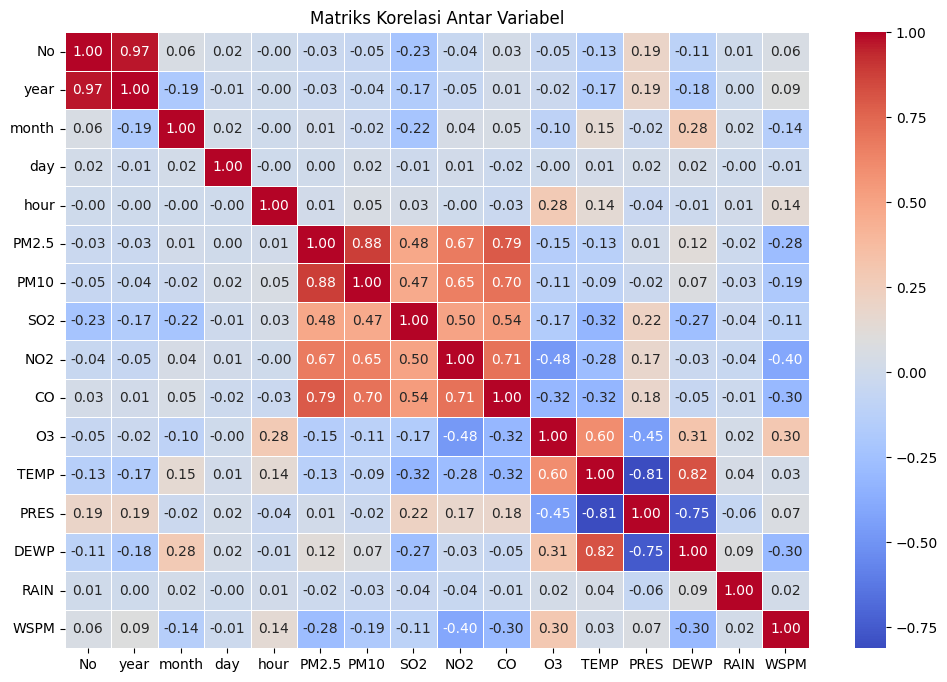

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(air_df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

**Insight:**
- Sebagian besar data PM2.5 dan PM10 berada di rentang rendah hingga sedang, namun ada beberapa outlier pada nilai tinggi.
- Distribusi PM2.5 dan PM10 cenderung skewed, mengindikasikan insiden polusi berat meskipun jarang.
- Korelasi antara PM2.5 dan PM10 sangat tinggi, menandakan keduanya sering berasal dari sumber polusi yang sama.
- Korelasi yang tinggi antar fitur utama perlu diperhatikan untuk mencegah redundansi saat feature selection dalam modeling.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren harian rata-rata PM2.5 sepanjang Maret 2013 di setiap stasiun?

<ipython-input-187-ecea6b4e0bbe>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='station', y='pm25_mean', data=mean_pm25_station, palette='Blues_r')


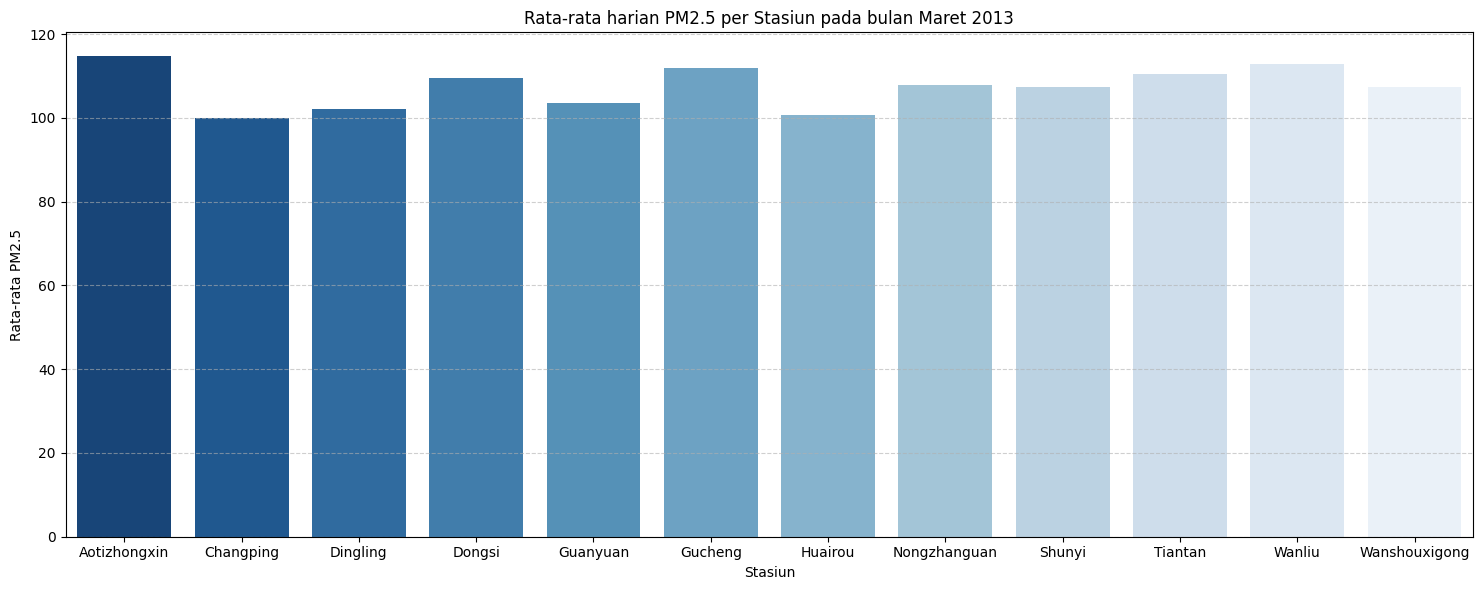

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk Maret 2013
mask = (air_df['year'] == 2013) & (air_df['month'] == 3)
maret_df = air_df[mask].copy()

# Hitung rata-rata PM2.5 per stasiun
mean_pm25_station = (
    maret_df
    .groupby('station')['PM2.5']
    .mean()
    .reset_index()
    .rename(columns={'PM2.5': 'pm25_mean'})
)

# Plot rata-rata PM2.5 per stasiun
plt.figure(figsize=(15,6))
sns.barplot(x='station', y='pm25_mean', data=mean_pm25_station, palette='Blues_r')
plt.title('Rata-rata harian PM2.5 per Stasiun pada bulan Maret 2013')
plt.xlabel('Stasiun')
plt.ylabel('Rata-rata PM2.5')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana distribusi kategori kualitas udara berdasarkan PM2.5 disetiap stasiun?

1. Rata-rata seluruh kategori kualitas udara setiap tahunnya

<ipython-input-185-2f4aa2d47b2d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PM2.5_category', data=air_df, palette="YlOrRd")


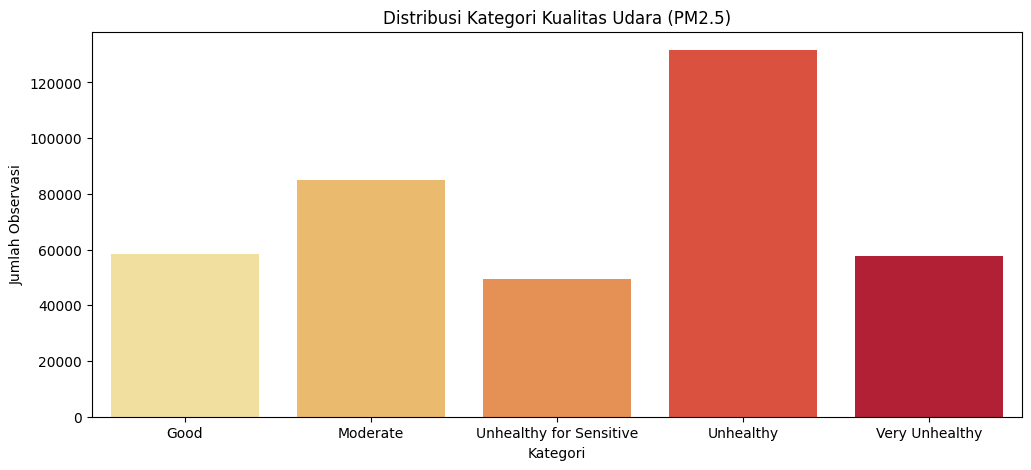

In [ ]:
bins = [0, 12, 35.4, 55.4, 150.4, float('inf')]
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy']
air_df['PM2.5_category'] = pd.cut(air_df['PM2.5'], bins=bins, labels=labels)

plt.figure(figsize=(12,5))
sns.countplot(x='PM2.5_category', data=air_df, palette="YlOrRd")
plt.title('Distribusi Kategori Kualitas Udara (PM2.5)')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Observasi')
plt.show()

2. Rata-rata kategori kualitas udara di bulan Maret 2013 di setiap stasiun

In [ ]:
# Mendefinisikan batas kategori PM2.5
bins = [0, 12, 35.4, 55.4, 150.4, float('inf')]
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy']

# Menambahkan kolom kategori ke DataFrame
maret_df['PM2.5_category'] = pd.cut(maret_df['PM2.5'], bins=bins, labels=labels)

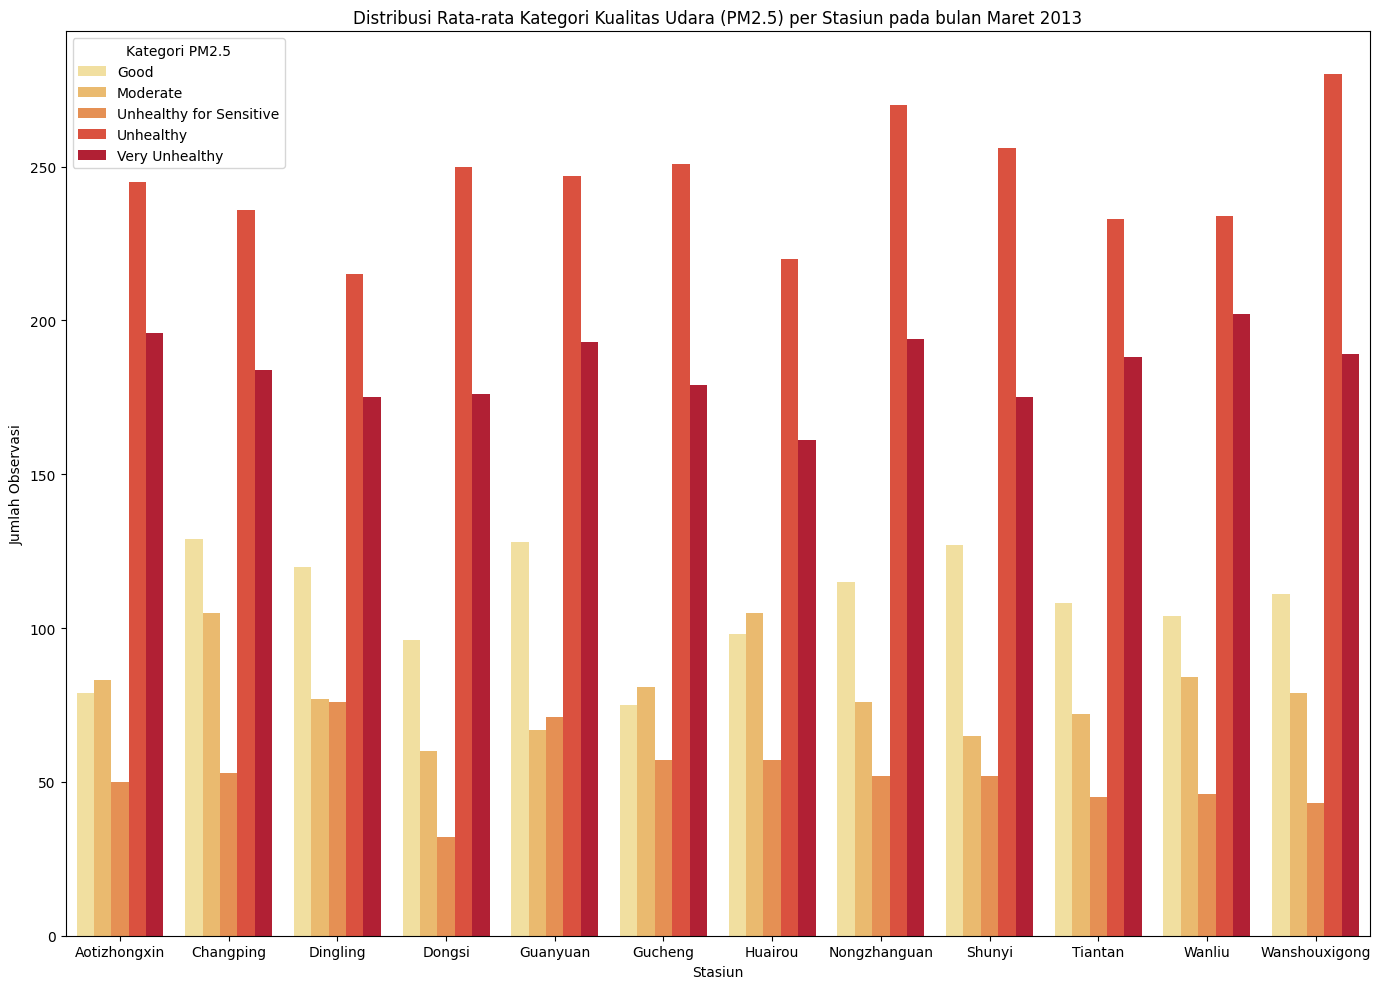

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.countplot(
    data=maret_df,
    x='station',
    hue='PM2.5_category',
    palette='YlOrRd'
)
plt.title('Distribusi Rata-rata Kategori Kualitas Udara (PM2.5) per Stasiun pada bulan Maret 2013')
plt.xlabel('Stasiun')
plt.ylabel('Jumlah Observasi')
plt.legend(title='Kategori PM2.5')
plt.tight_layout()
plt.show()

**Pertanyaan 1**

**Insight:**
- Dari grafik bar rata-rata harian PM2.5, terlihat bahwa semua stasiun  mengalami rata-rata PM2.5 yang cukup tinggi sepanjang bulan Maret 2013.
- Stasiun Aotizhongxin mencatatkan nilai rata-rata PM2.5 tertinggi di antara semua stasiun, bahkan mendekati 120 µg/m³, diikuti oleh Dongsi, Wanliu, dan Tiantan yang juga berada di atas 110 µg/m³.
- Tidak ada stasiun yang memiliki rata-rata PM2.5 di bawah 100 µg/m³, menandakan bahwa polusi udara di seluruh wilayah pemantauan selama Maret 2013 cukup mengkhawatirkan.

**Pertanyaan 2**

**Insight:**
- Dari grafik distribusi kategori kualitas udara, terlihat bahwa kategori “Unhealthy for Sensitive” dan “Unhealthy” mendominasi jumlah hari pada hampir semua stasiun.
- Kategori “Very Unhealthy” juga muncul cukup signifikan di sebagian besar stasiun, sementara kategori “Good” dan “Moderate” justru jumlahnya jauh lebih sedikit.

## Analisis Lanjutan (Opsional)

In [ ]:
import pandas as pd

bins = [0, 12, 35.4, 55.4, 150.4, float('inf')]
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy']

mean_pm25_station['Cluster_PM2.5'] = pd.cut(mean_pm25_station['pm25_mean'], bins=bins, labels=labels)

print(mean_pm25_station[['station', 'pm25_mean', 'Cluster_PM2.5']])

          station   pm25_mean Cluster_PM2.5
0    Aotizhongxin  114.719755     Unhealthy
1       Changping   99.991513     Unhealthy
2        Dingling  102.173454     Unhealthy
3          Dongsi  109.504886     Unhealthy
4        Guanyuan  103.579320     Unhealthy
5         Gucheng  112.015552     Unhealthy
6         Huairou  100.803432     Unhealthy
7    Nongzhanguan  107.977369     Unhealthy
8          Shunyi  107.345185     Unhealthy
9         Tiantan  110.498452     Unhealthy
10         Wanliu  112.871642     Unhealthy
11  Wanshouxigong  107.378917     Unhealthy


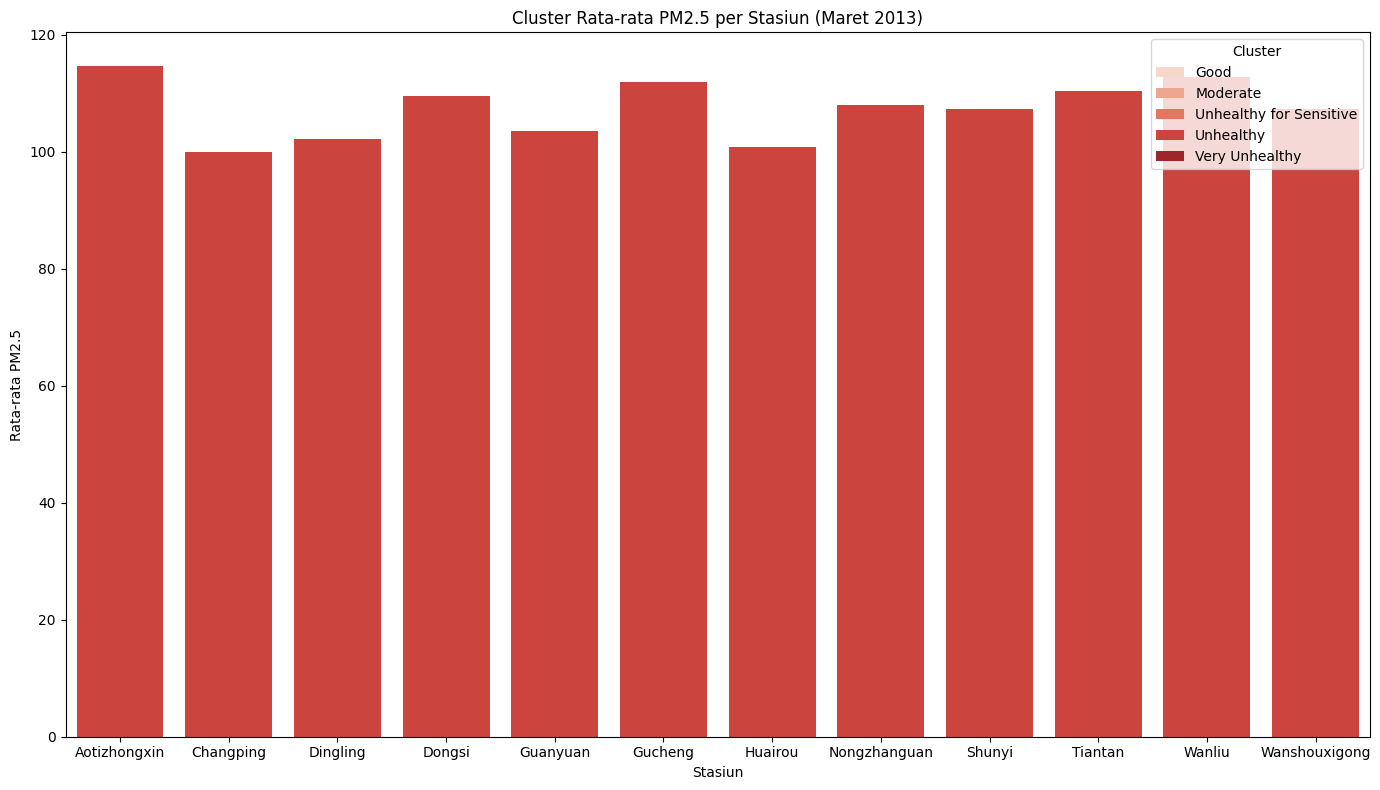

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.barplot(x='station', y='pm25_mean', hue='Cluster_PM2.5', data=mean_pm25_station, palette='Reds')
plt.title('Cluster Rata-rata PM2.5 per Stasiun (Maret 2013)')
plt.xlabel('Stasiun')
plt.ylabel('Rata-rata PM2.5')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1

  Dari hasil analisis ini, saya menyimpulkan bahwa polusi udara selama bulan Maret 2013 merupakan masalah serius di seluruh stasiun pemantauan, tanpa terkecuali. Dengan rata-rata PM2.5 yang tinggi di setiap lokasi, masyarakat di sekitar stasiun-stasiun tersebut sangat berpotensi terpapar udara yang tidak sehat setiap harinya. Hal ini memperjelas perlunya intervensi dan kebijakan yang serius dari pemerintah maupun pihak terkait untuk menekan sumber polusi, terutama di stasiun-stasiun dengan rata-rata PM2.5 tertinggi seperti Aotizhongxin dan Dongsi. Selain itu, hasil ini juga merupakan alarm bagi masyarakat untuk lebih peduli terhadap kualitas udara di lingkungan tempat tinggal mereka.

- Conclution pertanyaan 2

  Berdasarkan distribusi kategori kualitas udara, saya menyadari bahwa masyarakat di sekitar stasiun-stasiun pemantauan tidak hanya sesekali, tetapi hampir setiap hari dihadapkan pada risiko polusi udara yang tinggi. Kategori “Unhealthy” bahkan menjadi yang paling dominan, baik di stasiun dengan rata-rata PM2.5 tertinggi maupun yang lebih rendah. Ini artinya, masalah kualitas udara tidak hanya terjadi di lokasi tertentu saja, tetapi merupakan masalah bersama di seluruh wilayah pemantauan. Dengan kondisi seperti ini, sangat penting untuk melakukan edukasi publik tentang bahaya polusi udara dan mendorong pemerintah untuk memperkuat kebijakan pengendalian emisi, terutama di sektor transportasi dan industri.

#Lampiran

In [ ]:
air_df.to_csv("air_df.csv", index=False)

In [ ]:
!pip freeze > requirements.txt

In [ ]:
!cat requirements.txt

absl-py==1.4.0
accelerate==1.6.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.6
ale-py==0.11.0
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.4.28.0.37.27
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.1.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blosc2==3.3.2
bokeh==3.7.2
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.4.26
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
commun